## Aproximación de autovalores

Vamos a ver como se comporta los autovalores, y si estos pueden ser computados como combinacion lineal. 

Teniendo dos matrices $A$ y $B$, vamos a ver si $\alpha \cdot A + \beta \cdot B$ tiene los mismos autovalores, o por lo menos una aproximación de ellos esta dada por $\alpha \cdot \lambda_A + \beta \cdot \lambda_B$

La forma en la que vamos a comprobar esto, es calculando los autovalores para las matrices $A$ y $B$ que en este caso van a ser 

$$ A = \begin{bmatrix} 
    1 & -2 \\ 
    3 & 15 
\end{bmatrix} $$ 
$$ B = \begin{bmatrix} 
    27 & 11 \\ 
    -13 & -17 
\end{bmatrix} $$

Donde su descomposición son: 
$$ A = \begin{bmatrix} 
    -4,519 & -0,148 \\ 
    1 & 1 
\end{bmatrix}
\begin{bmatrix} 
    1,443 & 0 \\ 
    0 & 14,557 
\end{bmatrix}
\begin{bmatrix} 
    -4,519 & -0,148 \\ 
    1 & 1 
\end{bmatrix}^{-1} $$
$$ B = \begin{bmatrix} 
    -0,272 & -3,113 \\ 
    1 & 1 
\end{bmatrix}
\begin{bmatrix} 
    -13,446 & 0 \\ 
    0 & 23,466 
\end{bmatrix}
\begin{bmatrix} 
    -0,272 & -3,113 \\ 
    1 & 1 
\end{bmatrix}^{-1} $$

In [46]:
import numpy as np
from numpy.linalg import eig, norm
import matplotlib.pyplot as plt

In [47]:
matrizA = np.array([
    [1, -2],
    [3, 15]
])

matrizB = np.array([
    [27, 11],
    [-13, -17]
])

In [48]:
autoValoresA, _ = eig(matrizA)
autoValoresB, _ = eig(matrizB)

def CalcularAutovalor(alfa : float, beta : float) -> np.array:
    return autoValoresA * alfa + autoValoresB * beta

def CalcularAutovectores(matriz : np.array, autovalores : np.array) -> np.array:
    dimensiones = len(autovalores)
    autovectores = np.zeros([dimensiones, dimensiones])    
    for indice, autovalor in enumerate(autovalores):
        matrizAux = matriz - autovalor * np.eye(dimensiones)
        autovectores[1, indice] = 1
        autovectores[0, indice] = - matrizAux[0, 1] / matrizAux[0, 0]

    return autovectores

Comprobemos que dados autovaloes conocidos nos da un error entendible

In [49]:
autoVectoresA = CalcularAutovectores(matrizA, autoValoresA)
matrizAAprox = autoVectoresA @ np.diag(autoValoresA) @ np.linalg.inv(autoVectoresA)
print(norm(matrizA - matrizAAprox))

1.793620188084545e-15


Ya viendo que funciona nuestro método con valores conocidos, veamos que tan buena aproximación podemos generar.  

Primero modificaremos los valores de alfa, para ver que tanto error producimos

In [54]:
delta = 0.1
radio = 10

valoresAlfa = np.arange(-radio, radio + delta, delta)
valorBeta = 0.1

largo = len(valoresAlfa)

valoresResultado = np.zeros(largo, dtype = complex)

matrizCompuesta = lambda a, b: a * matrizA + b * matrizB

for indice, valorAlfa in enumerate(valoresAlfa):
    matrizActual = matrizCompuesta(valorAlfa, valorBeta)
    
    autoValores = CalcularAutovalor(valorAlfa, valorBeta)
    autoVectoresA = CalcularAutovectores(matrizActual, autoValores)
    matrizAprox = autoVectoresA @ np.diag(autoValores) @ np.linalg.inv(autoVectoresA)

    valoresResultado[indice] = np.abs(norm(matrizActual - matrizAprox))

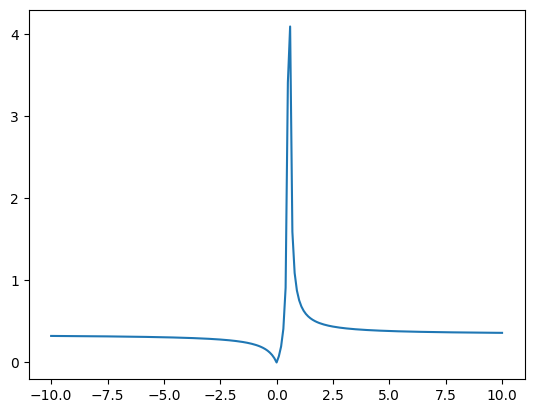

In [57]:
plt.figure()
plt.plot(valoresAlfa, valoresResultado)
plt.show()